In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

##### Read cleaned dataset

In [2]:
data_df = pd.read_csv('../data/cleaned_data_ml.csv', index_col=None)

##### Exploratory Data Analysis Summary Statistics

In [3]:
#describe on all diff columns 

diff_columns = [col for col in data_df.columns if col.startswith('diff')]
diff_metrics = data_df[diff_columns]
summary_of_stats = diff_metrics.describe()

summary_of_stats

,diff_wins,diff_losses,diff_fight_age,diff_height_inches,diff_reach_inches,diff_knockdowns,diff_significant_strikes_landed,diff_significant_strikes_thrown,diff_total_strikes_landed,diff_total_strikes_thrown,...,diff_takedown_accuracy,diff_head_strike_ratio,diff_body_strike_ratio,diff_leg_strike_ratio,diff_fight_duration,diff_win_rate,diff_knockdown_percentage,diff_ko_rate,diff_submission_rate,diff_finish_rate
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,...,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4553.000000,4567.000000,4567.000000,4567.000000
mean,0.632582,0.328443,0.117364,0.072257,0.093278,-0.007226,0.466608,1.613094,0.628859,1.902124,...,0.006701,0.001440,0.001086,-0.002819,-0.007760,0.007655,0.000465,0.006138,0.006138,0.007808
std,10.057516,5.606793,5.304423,2.474847,3.253162,0.760207,28.383923,46.193624,47.267693,64.663415,...,0.370313,0.218850,0.111637,0.128310,0.845463,0.330613,0.030400,0.390920,0.390920,0.433870
min,-70.000000,-23.000000,-17.000000,-13.000000,-12.000000,-4.000000,-312.000000,-461.000000,-315.000000,-462.000000,...,-1.000000,-1.000000,-0.890411,-1.000000,-6.600000,-3.000000,-0.500000,-1.000000,-1.000000,-1.000000
25%,-5.000000,-3.000000,-3.500000,-1.000000,-2.000000,0.000000,-14.000000,-20.000000,-20.000000,-28.000000,...,-0.223404,-0.136767,-0.064690,-0.067320,-0.500000,-0.172222,-0.004732,-0.214286,-0.214286,-0.270215
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,...,0.000000,0.000442,0.000074,-0.000478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,4.000000,4.000000,2.000000,2.000000,0.000000,15.000000,24.000000,22.000000,33.000000,...,0.246906,0.141477,0.067147,0.065295,0.500000,0.200000,0.004988,0.250000,0.250000,0.295455
max,72.000000,23.000000,18.000000,9.000000,11.000000,4.000000,131.000000,348.000000,276.000000,370.000000,...,1.000000,1.000000,0.941176,0.926366,4.000000,2.500000,1.000000,1.000000,1.000000,2.500000


In [4]:
print(data_df[data_df['weight_class_heavyweight'] == 1].describe())

           target  total_fight_rounds  win_by_decision   win_by_dq  \
count  406.000000          406.000000       406.000000  406.000000   
mean     0.509852            2.189655         0.334975    0.002463   
std      0.500520            1.100389         0.472564    0.049629   
min      0.000000            1.000000         0.000000    0.000000   
25%      0.000000            1.000000         0.000000    0.000000   
50%      1.000000            2.000000         0.000000    0.000000   
75%      1.000000            3.000000         1.000000    0.000000   
max      1.000000            5.000000         1.000000    1.000000   

        win_by_ko  win_by_overturn  win_by_sub  fighter_A_stance_Orthodox  \
count  406.000000       406.000000  406.000000                 406.000000   
mean     0.536946         0.009852    0.115764                   0.906404   
std      0.499248         0.098890    0.320336                   0.291625   
min      0.000000         0.000000    0.000000               

In [5]:
data_df[data_df['target'] == 0].describe()

,target,total_fight_rounds,win_by_decision,win_by_dq,win_by_ko,win_by_overturn,win_by_sub,fighter_A_stance_Orthodox,fighter_A_stance_Southpaw,fighter_A_stance_Switch,...,diff_takedown_accuracy,diff_head_strike_ratio,diff_body_strike_ratio,diff_leg_strike_ratio,diff_fight_duration,diff_win_rate,diff_knockdown_percentage,diff_ko_rate,diff_submission_rate,diff_finish_rate
count,2293.0,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,...,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2286.000000,2293.000000,2293.000000,2293.000000
mean,0.0,2.457479,0.487135,0.000436,0.336677,0.013519,0.162233,0.758831,0.194505,0.045792,...,-0.000133,-0.004272,0.002037,-0.001681,-0.020755,-0.024932,0.000422,0.011443,0.011443,0.006619
std,0.0,1.042949,0.499943,0.020883,0.472676,0.115510,0.368745,0.427886,0.395906,0.209078,...,0.371358,0.220294,0.111763,0.131259,0.838094,0.324930,0.025754,0.388326,0.388326,0.435811
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-0.616563,-0.984733,-4.000000,-1.000000,-0.312057,-1.000000,-1.000000,-1.000000
25%,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,-0.238095,-0.141602,-0.063630,-0.069092,-0.541667,-0.216667,-0.004669,-0.200000,-0.200000,-0.266667
50%,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,-0.006109,0.001371,0.000869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.230769,0.134784,0.066769,0.067521,0.500000,0.156566,0.004696,0.250000,0.250000,0.291667
max,0.0,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.941176,0.926366,4.000000,1.166667,0.333333,1.000000,1.000000,1.000000


In [6]:
data_df[data_df['target'] == 1].describe()

,target,total_fight_rounds,win_by_decision,win_by_dq,win_by_ko,win_by_overturn,win_by_sub,fighter_A_stance_Orthodox,fighter_A_stance_Southpaw,fighter_A_stance_Switch,...,diff_takedown_accuracy,diff_head_strike_ratio,diff_body_strike_ratio,diff_leg_strike_ratio,diff_fight_duration,diff_win_rate,diff_knockdown_percentage,diff_ko_rate,diff_submission_rate,diff_finish_rate
count,2274.0,2274.000000,2274.000000,2274.000000,2274.000000,2274.0,2274.000000,2274.000000,2274.000000,2274.000000,...,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2267.000000,2274.000000,2274.000000,2274.000000
mean,1.0,2.459543,0.491205,0.003518,0.328056,0.0,0.177221,0.729991,0.213281,0.054969,...,0.013592,0.007200,0.000128,-0.003966,0.005344,0.040516,0.000507,0.000789,0.000789,0.009008
std,0.0,1.043020,0.500033,0.059222,0.469609,0.0,0.381939,0.444062,0.409714,0.227970,...,0.369209,0.217280,0.111525,0.125285,0.852812,0.333103,0.034463,0.393530,0.393530,0.431997
min,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.772908,-0.890411,-1.000000,-6.600000,-3.000000,-0.500000,-1.000000,-1.000000,-1.000000
25%,1.0,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,-0.213745,-0.134133,-0.065470,-0.065970,-0.500000,-0.151515,-0.004794,-0.241883,-0.241883,-0.281944
50%,1.0,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.006931,-0.001043,-0.002642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,3.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.250000,0.148346,0.067901,0.063381,0.500000,0.250000,0.005333,0.250000,0.250000,0.297078
max,1.0,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.833333,0.500000,0.899099,4.000000,2.500000,1.000000,1.000000,1.000000,2.500000


In [7]:
correlation_matrix  = data_df[diff_columns].corr()

In [8]:
print(correlation_matrix)

                                 diff_wins  diff_losses  diff_fight_age  \
diff_wins                         1.000000     0.604055        0.172373   
diff_losses                       0.604055     1.000000        0.328616   
diff_fight_age                    0.172373     0.328616        1.000000   
diff_height_inches               -0.000790    -0.049819       -0.172099   
diff_reach_inches                 0.045099    -0.036321       -0.144622   
diff_knockdowns                   0.044424    -0.027704       -0.131278   
diff_significant_strikes_landed   0.085099    -0.132195       -0.152286   
diff_significant_strikes_thrown   0.055888    -0.096519       -0.175593   
diff_total_strikes_landed         0.080373    -0.126567       -0.110029   
diff_total_strikes_thrown         0.064713    -0.109523       -0.141826   
diff_takedowns_landed             0.035691    -0.138116       -0.044235   
diff_takedowns_thrown             0.021600    -0.102993        0.047712   
diff_head_strikes_landed 

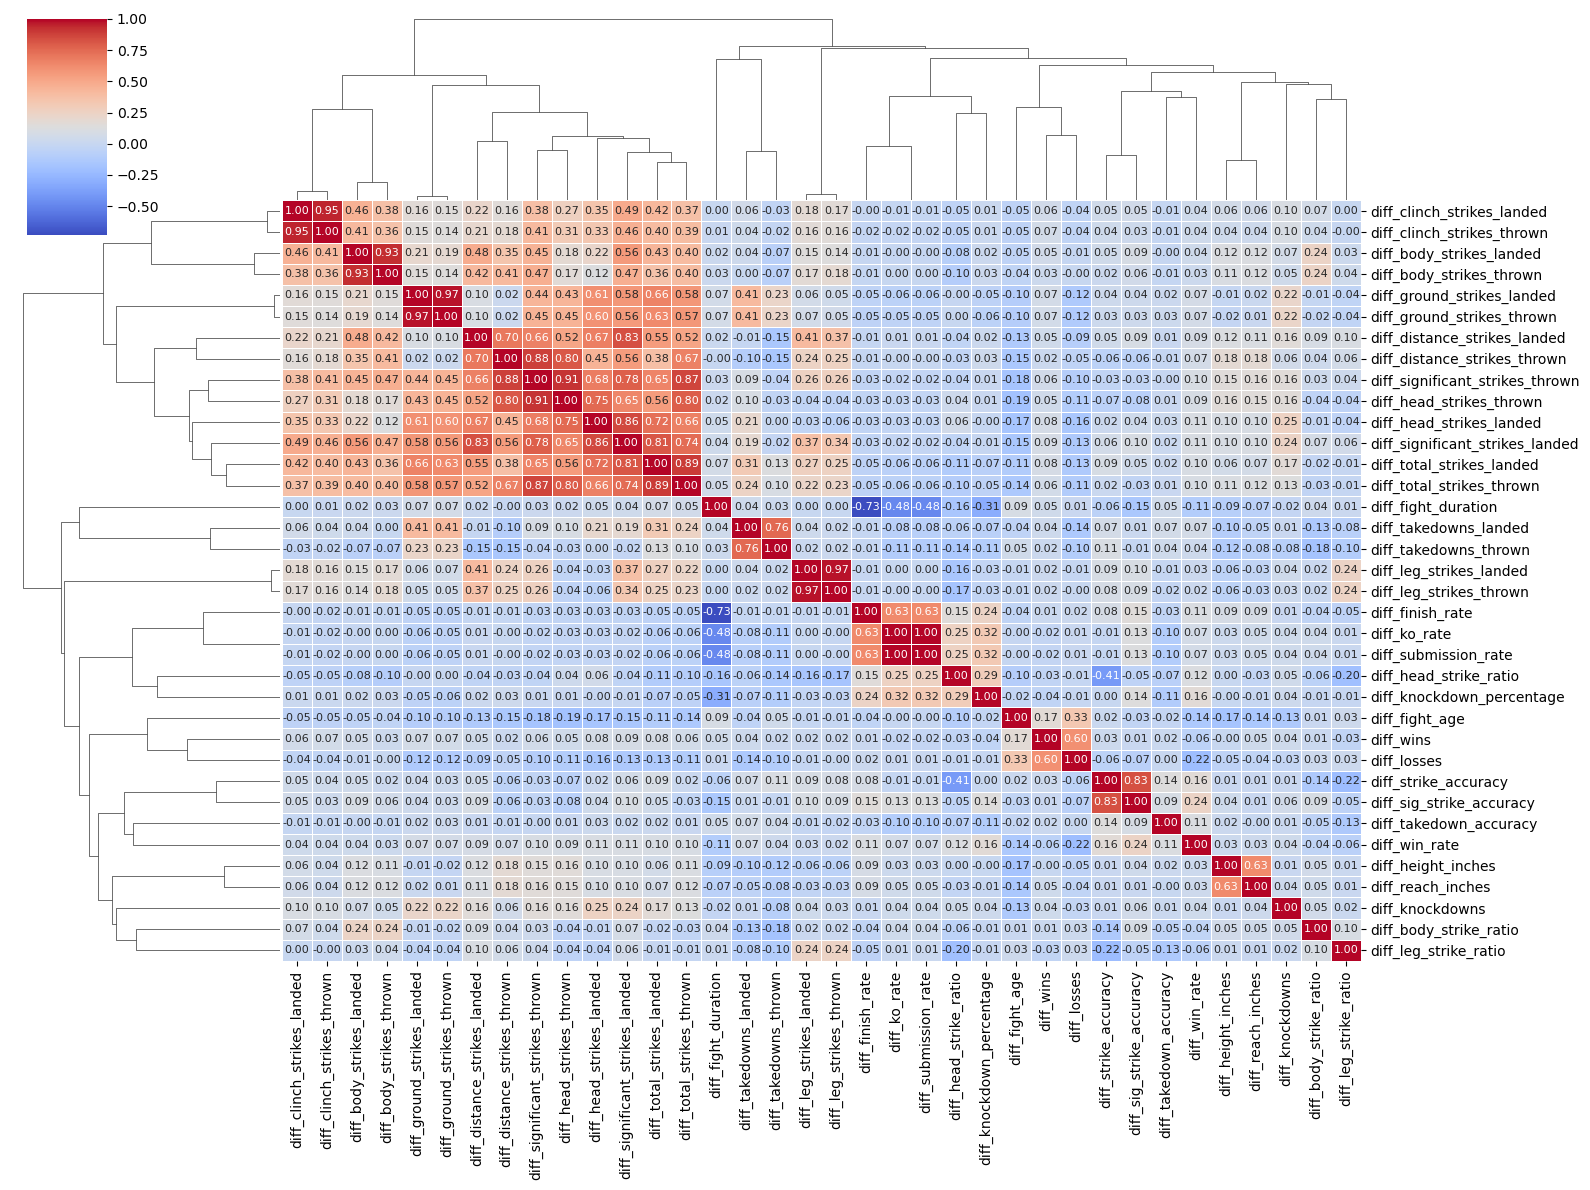

In [9]:
sns.clustermap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    annot_kws={"size": 8},
    figsize=(16, 12)
)


<Figure size 1500x1000 with 0 Axes>

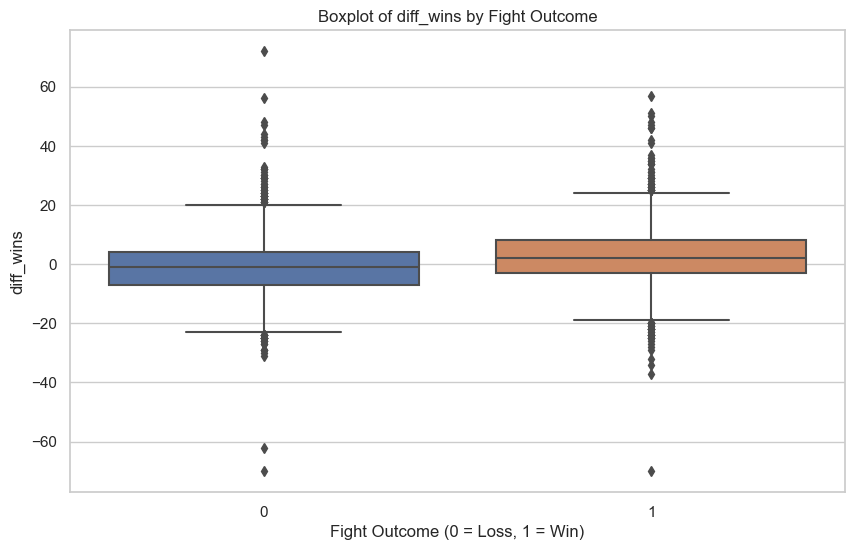

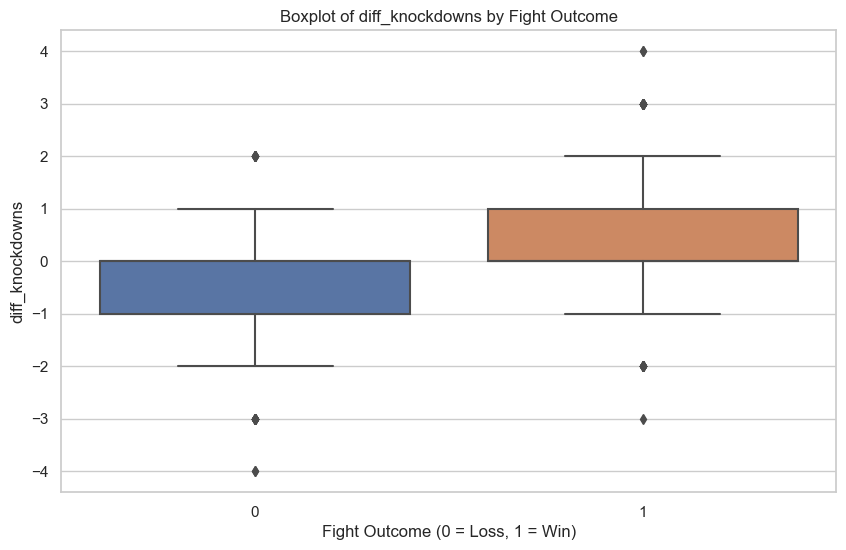

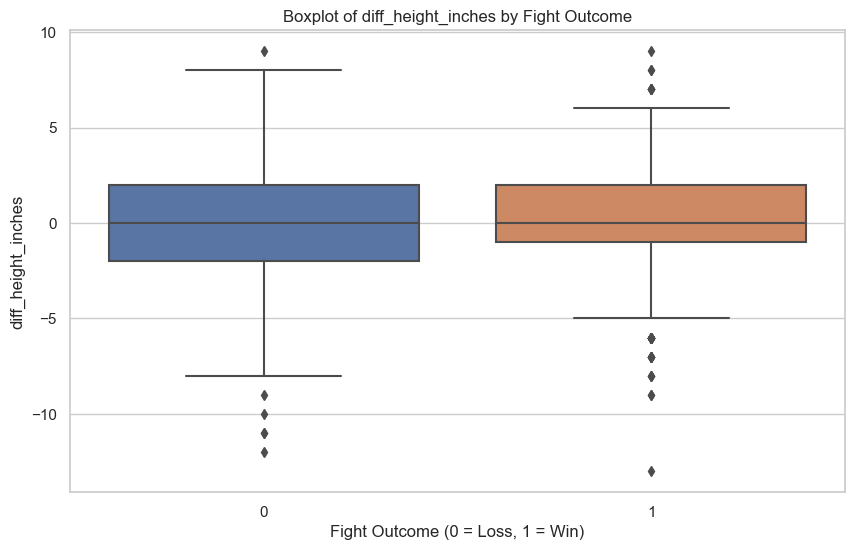

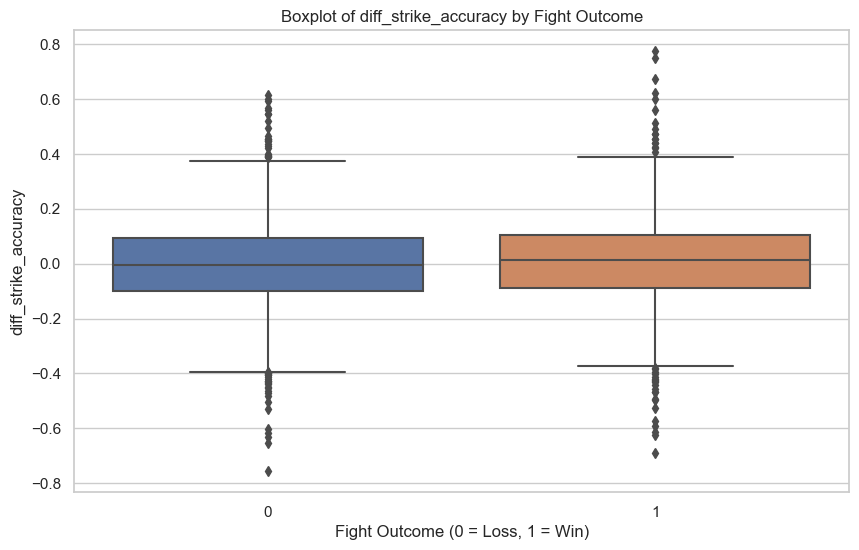

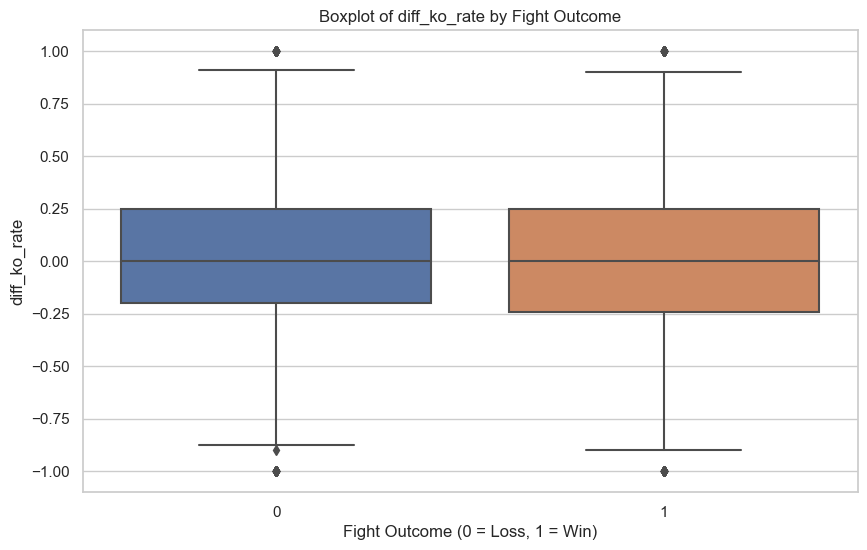

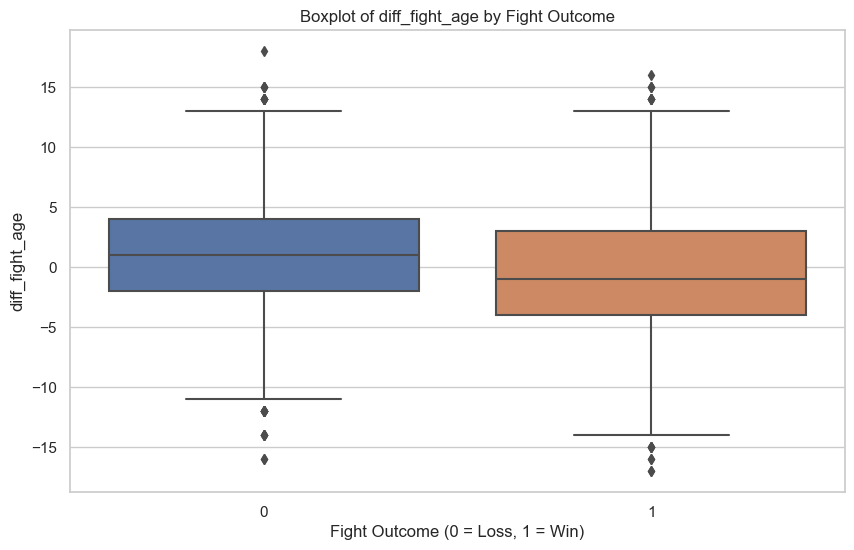

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected metrics to plot
metrics_to_plot = [
    'diff_wins', 'diff_knockdowns', 'diff_height_inches',
    'diff_strike_accuracy', 'diff_ko_rate', 'diff_fight_age'
]

# Set up the plot size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Iterate through the selected metrics and create a boxplot for each
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=metric, data=data_df)
    plt.title(f'Boxplot of {metric} by Fight Outcome')
    plt.xlabel('Fight Outcome (0 = Loss, 1 = Win)')
    plt.ylabel(metric)
    plt.show()
